In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [143]:
df= pd.read_csv(r"C:\Users\VEDA\Desktop\GL_DS_case study\GL_ASS_DS_case study\product_data.csv")
df.head()

,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,1,58.90,13.29,1,1,2,72.19
1,1,239.90,19.93,1,1,3,259.83
2,1,199.00,17.87,1,1,5,216.87
3,1,12.99,12.79,1,1,2,25.78
4,1,199.90,18.14,1,1,3,218.04


In [144]:
df.tail()

,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
101330,4,55.00,34.19,1,2,1,356.76
101331,1,119.85,20.03,1,1,3,139.88
101332,1,99.90,16.95,1,1,3,116.85
101333,1,55.99,8.72,1,1,3,64.71
101334,1,43.00,12.79,1,1,1,55.79


In [145]:
print('The dataset has {} rows and {} columns'.format(df.shape[0],df.shape[1]))

print('The total size of dataset is {}'.format(df.size))

The dataset has 101335 rows and 7 columns
The total size of dataset is 709345


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101335 entries, 0 to 101334
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_item_id         101335 non-null  int64  
 1   price                 101335 non-null  float64
 2   freight_value         101335 non-null  float64
 3   payment_sequential    101335 non-null  int64  
 4   payment_type          101335 non-null  int64  
 5   payment_installments  101335 non-null  int64  
 6   payment_value         101335 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 5.4 MB


In [70]:
df.duplicated().sum()

25259

#### There are no null values and 25259 duplicate records

In [71]:
df.columns

Index(['order_item_id', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value'],
      dtype='object')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,101335.0,1.205280,0.715244,1.00,1.00,1.00,1.00,21.00
price,101335.0,79.818332,56.057932,0.85,35.99,63.90,109.90,270.00
freight_value,101335.0,16.126716,5.943237,0.00,12.69,15.47,18.67,36.00
payment_sequential,101335.0,1.089495,0.689100,1.00,1.00,1.00,1.00,26.00
payment_type,101335.0,1.352040,0.652362,1.00,1.00,1.00,2.00,4.00
payment_installments,101335.0,2.671703,2.524321,0.00,1.00,1.00,3.00,24.00
payment_value,101335.0,124.124508,124.418064,0.00,55.55,95.40,155.84,3195.73


##### payment_sequential, order_id has no clear pattern of data, and most of the distribution is for 1, so further in the process we are going to drop these.Payment_type most customers preferred is 1, least is 4, price is our target variable and it is right skewed,frieght_value is slightly right skewed. Payment value varies from 0 to 3195.73 and it is right skewed with so many outliers.

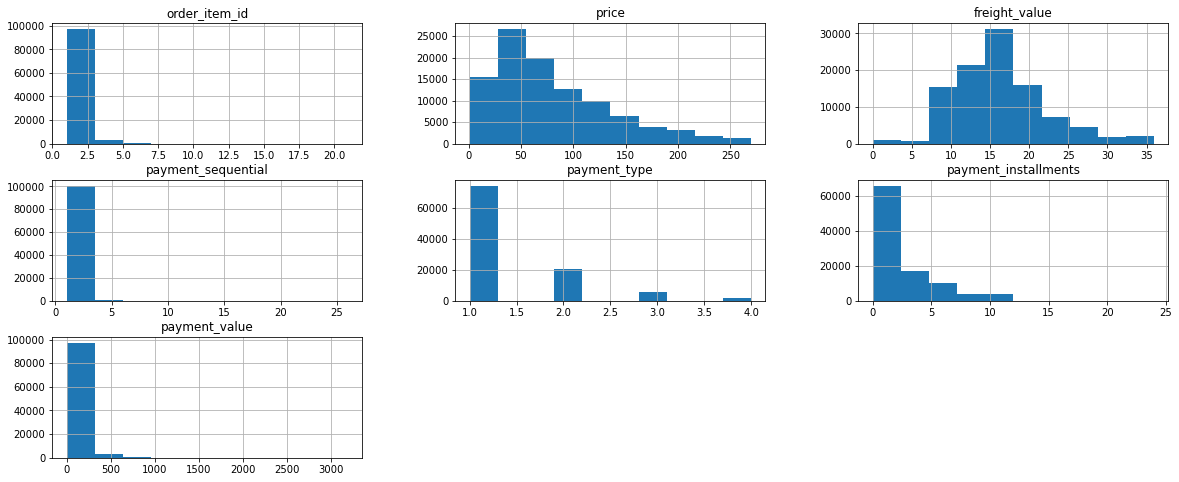

In [12]:
df.hist(figsize=(20,8));

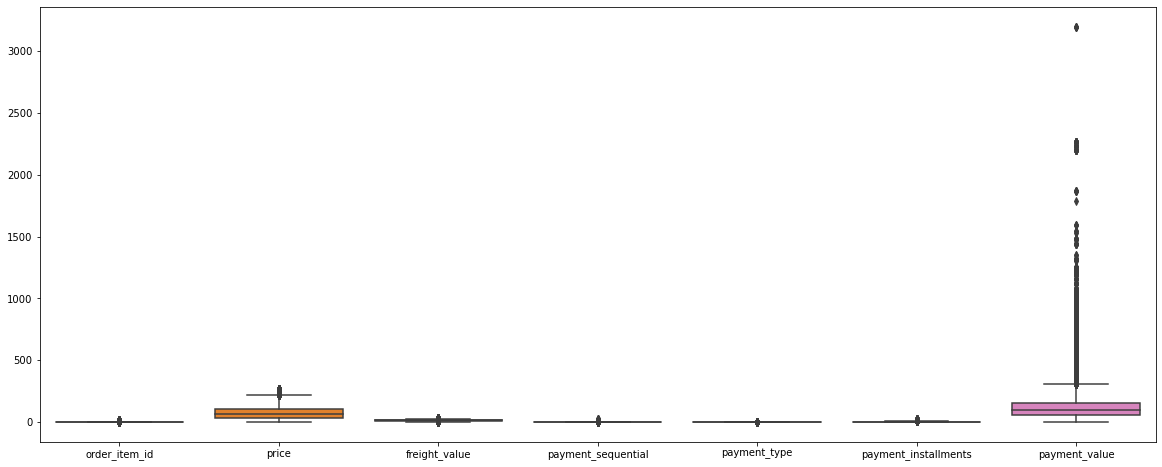

In [27]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df);

##### All variables are having outliers 

In [15]:
df.payment_type.unique()

array([1, 2, 3, 4], dtype=int64)

In [16]:
df.payment_installments.unique()

array([ 2,  3,  5,  1,  4,  6,  7, 10,  9,  8, 12, 15, 13, 11, 14, 17,  0,
       18, 16, 21, 24, 23, 20, 22], dtype=int64)

In [17]:
df.order_item_id.value_counts()

1     88182
2      9265
3      2163
4       886
5       415
6       236
7        50
8        28
9        23
10       22
11       16
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: order_item_id, dtype: int64

In [18]:
df.payment_sequential.value_counts()

1     97070
2      2856
3       563
4       271
5       153
6       103
7        70
8        48
9        39
10       33
11       28
12       21
13       13
14       10
15        9
16        8
17        8
18        8
19        8
20        5
21        5
22        2
23        1
24        1
25        1
26        1
Name: payment_sequential, dtype: int64

### Univariate Analysis

In [33]:
def univariateAnalysis_numeric(column, nbins):
    plt.figure()
    print('Distribution of ' + column)
    sns.distplot(df[column], kde=True, color= 'g');
    plt.show()
    
    
    plt.figure()
    print('Boxplot of ' + column)
    sns.boxplot(x=df[column])
    plt.show()
    

Distribution of order_item_id


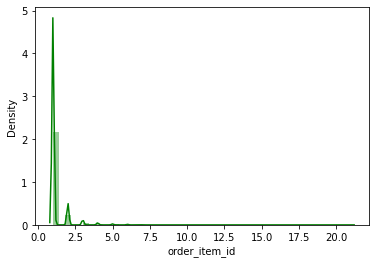

Boxplot of order_item_id


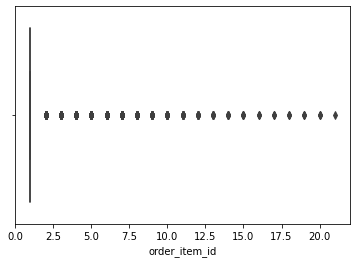

Distribution of price


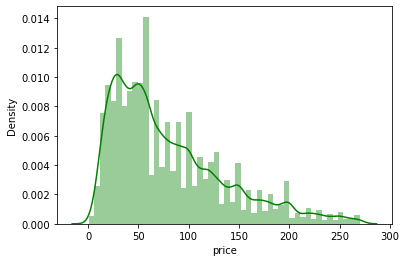

Boxplot of price


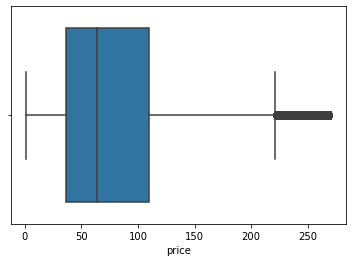

Distribution of freight_value


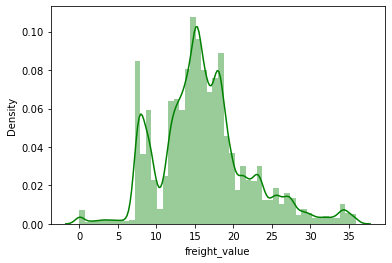

Boxplot of freight_value


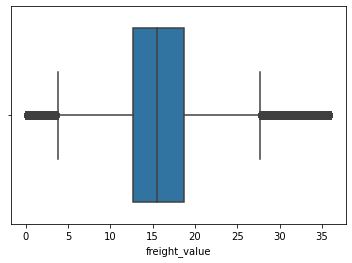

Distribution of payment_sequential


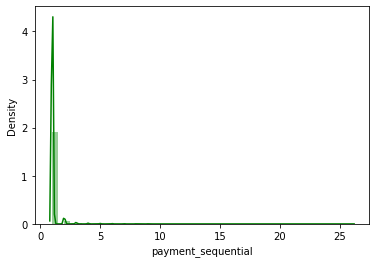

Boxplot of payment_sequential


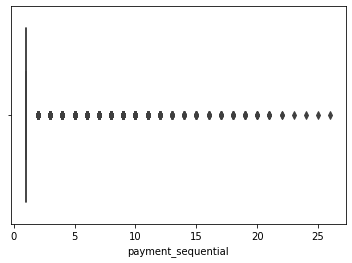

Distribution of payment_type


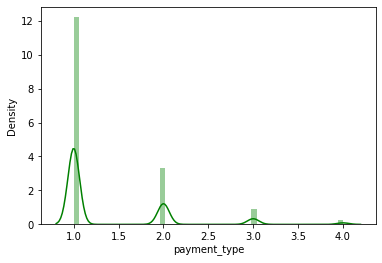

Boxplot of payment_type


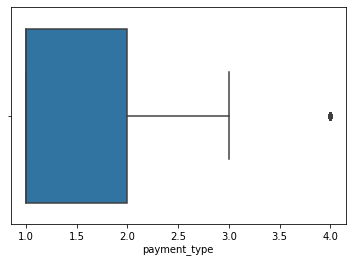

Distribution of payment_installments


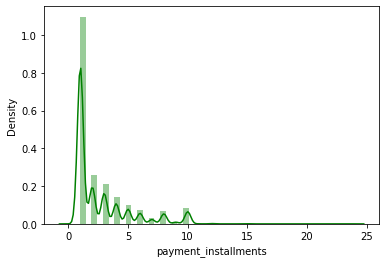

Boxplot of payment_installments


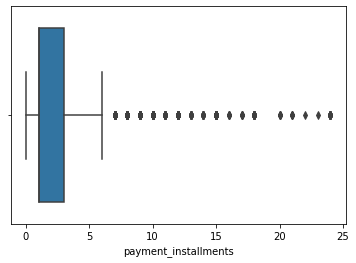

Distribution of payment_value


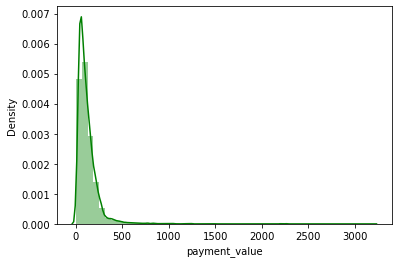

Boxplot of payment_value


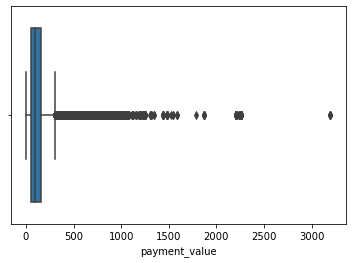

In [34]:
for x in df:
    univariateAnalysis_numeric(x, 10)

In [37]:
Skewness= pd.DataFrame(df.skew())
Skewness

,0
order_item_id,7.590041
price,1.085329
freight_value,0.643719
payment_sequential,15.557169
payment_type,1.946105
payment_installments,1.823110
payment_value,6.060629


### Bivariate Analysis

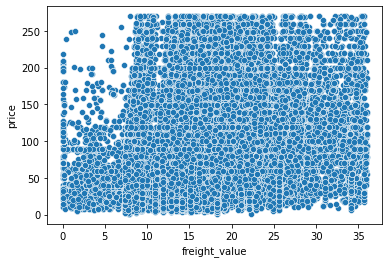

In [39]:
sns.scatterplot(x='freight_value', y='price', data=df);

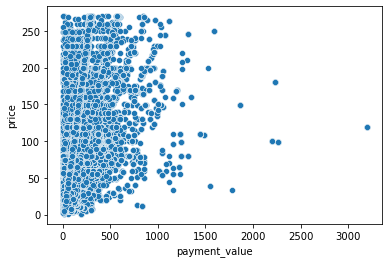

In [40]:
sns.scatterplot(x='payment_value', y='price', data=df);

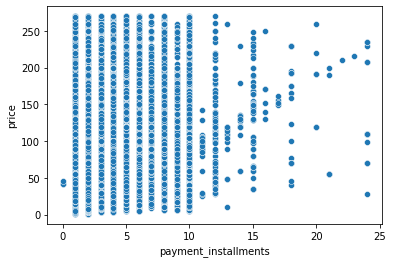

In [41]:
sns.scatterplot(x='payment_installments', y='price', data=df);

### Multivariate Analysis

In [44]:
corr = df.corr(method='pearson')
print('Correlation matrix \n')
pd.DataFrame(corr.T)

Correlation matrix 



,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
order_item_id,1.000000,-0.086088,-0.053521,-0.000454,0.001351,0.100587,0.496959
price,-0.086088,1.000000,0.293216,-0.013600,-0.068938,0.263285,0.503678
freight_value,-0.053521,0.293216,1.000000,0.008427,-0.014075,0.131469,0.182810
payment_sequential,-0.000454,-0.013600,0.008427,1.000000,0.318443,-0.083438,-0.099296
payment_type,0.001351,-0.068938,-0.014075,0.318443,1.000000,-0.357374,-0.087463
payment_installments,0.100587,0.263285,0.131469,-0.083438,-0.357374,1.000000,0.277605
payment_value,0.496959,0.503678,0.182810,-0.099296,-0.087463,0.277605,1.000000


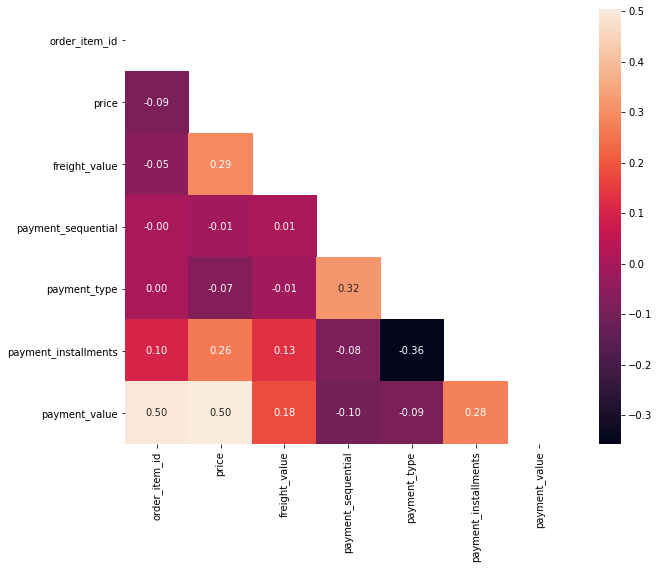

In [46]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot=True,fmt='.2f',mask=mask)
plt.show()

#### No prominant correlation obsserved, no multicollinearity

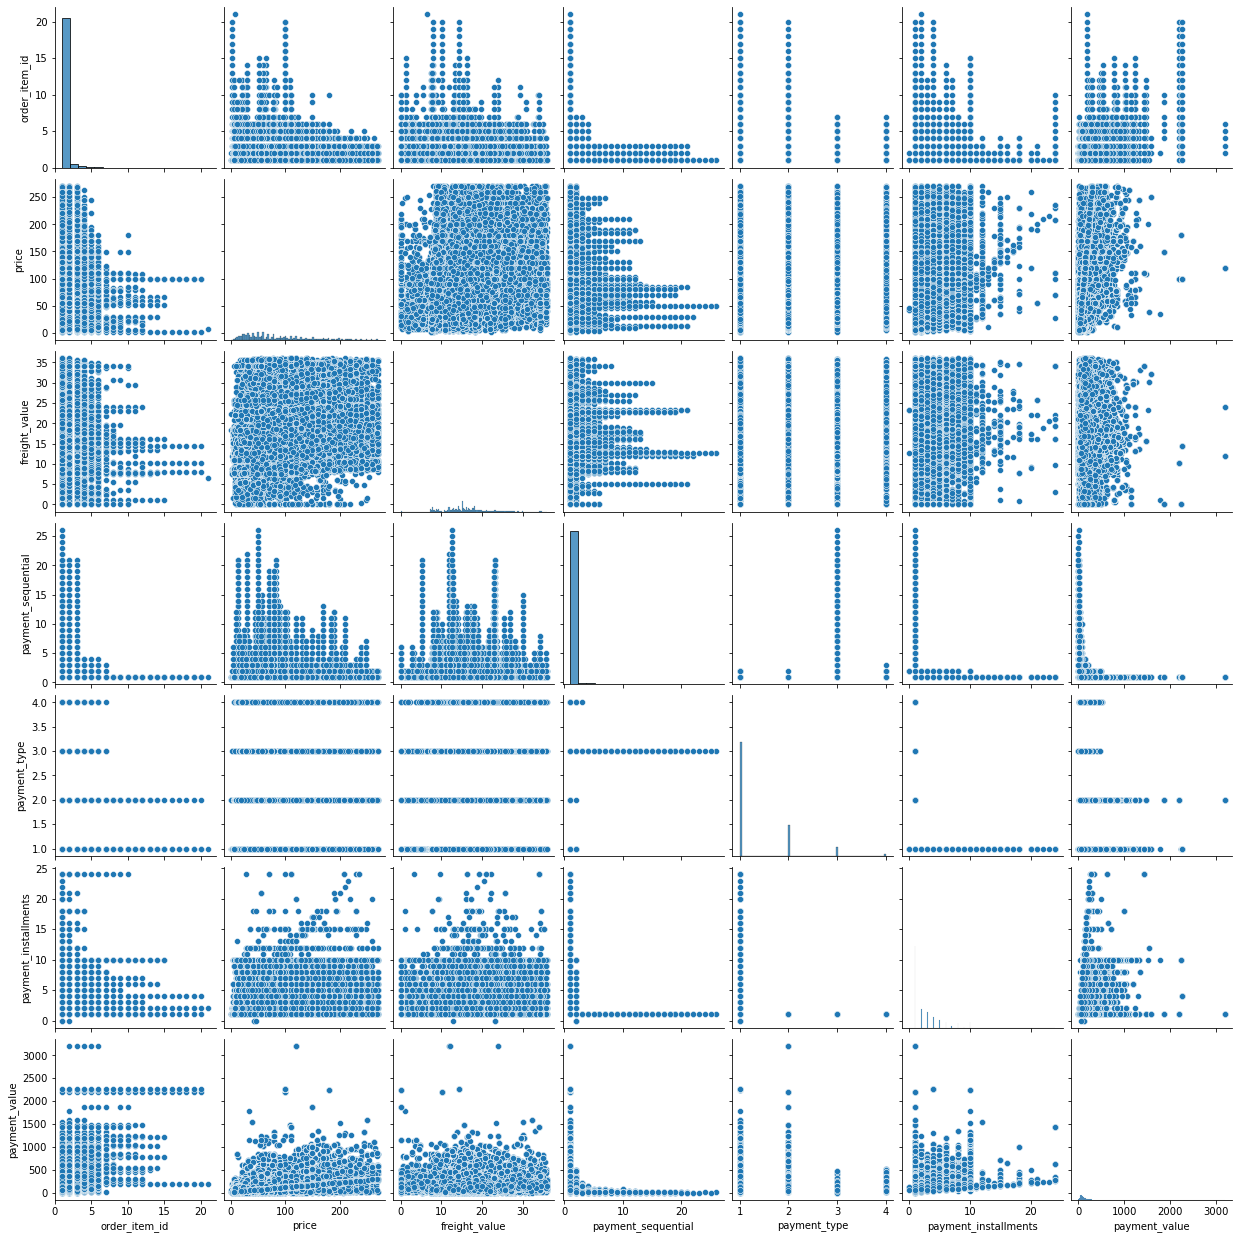

In [48]:
sns.pairplot(df);

#### It is clearly observed that payment type is categorical, others are continuous.No linear relationship observed between independent variables

In [146]:
df_new= df.copy()

#### Since linear regression model is sensitive to outliers, we are treating outliers by capping method

### Capping

In [165]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [166]:
for column in df.columns: 
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

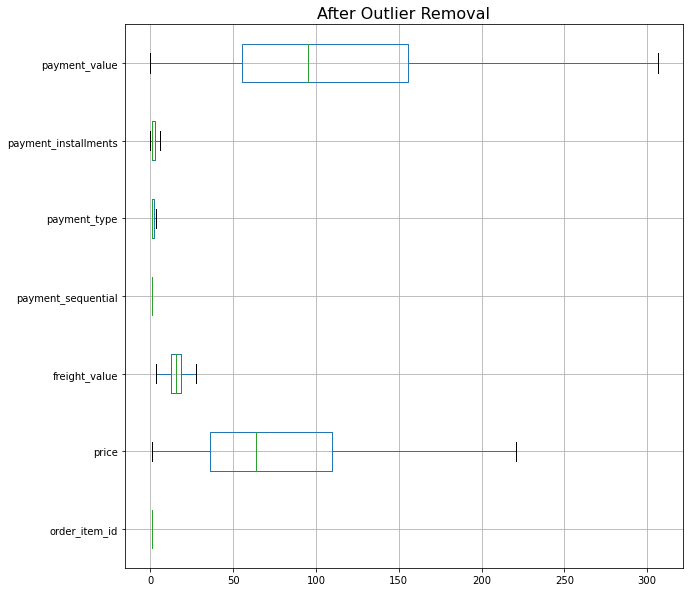

In [167]:
plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()


In [168]:
df= df.drop(['order_item_id','payment_sequential'], axis=1) ### Dropping order_item_id, payment_sequential variables
df.head()

,price,freight_value,payment_type,payment_installments,payment_value
0,58.900,13.29,1.0,2.0,72.19
1,220.765,19.93,1.0,3.0,259.83
2,199.000,17.87,1.0,5.0,216.87
3,12.990,12.79,1.0,2.0,25.78
4,199.900,18.14,1.0,3.0,218.04


In [55]:
###df['price']= np.log(df['price'])
###df['freight_value']=np.log(df['freight_value'])
###df['payment_value']=np.log(df['payment_value'])

#### Splitting the data into 70% train and 30% test data

In [169]:
X=df.drop('price',axis=1)
y=df[['price']]

In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

### Building Linear Regression model

In [172]:
print('Number of rows and column in X_train is',X_train.shape)
print('Number of rows and column in X_test is',X_test.shape)
print('Number of rows and column in y_train is',y_train.shape)
print('Number of rows and column in y_test is',y_test.shape)

Number of rows and column in X_train is (70934, 4)
Number of rows and column in X_test is (30401, 4)
Number of rows and column in y_train is (70934, 1)
Number of rows and column in y_test is (30401, 1)


In [173]:
### fitting into Regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

#### Coefficients of variables

In [174]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for freight_value is 1.2317501392162113
The coefficient for payment_type is 3.670182503448656
The coefficient for payment_installments is 1.2226038619000028
The coefficient for payment_value is 0.46303984497257433


#### intercept/constant

In [175]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1.379948103486612


#### Train accuracy R^2

In [176]:
regression_model.score(X_train, y_train)

0.49542789949083443

#### RMSE on Training data

In [177]:
from sklearn import metrics
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

38.616769331887255

#### RMSE on Testing data

In [178]:
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

38.131861213698095

### Using Statsmodel library to get R type outputs
#### This library expects the X and Y to be given in one single dataframe

In [179]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,freight_value,payment_type,payment_installments,payment_value,price
66307,18.73,1.0,2.0,88.720,69.99
8719,15.38,2.0,1.0,306.275,89.90
23243,13.37,2.0,1.0,52.370,39.00
70681,25.63,1.0,1.0,47.630,22.00
2877,13.81,1.0,2.0,153.800,139.99


In [180]:
data_train.columns

Index(['freight_value', 'payment_type', 'payment_installments',
       'payment_value', 'price'],
      dtype='object')

In [185]:
expr='price ~ freight_value + payment_type + payment_installments + payment_value'

In [186]:
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept              -1.379948
freight_value           1.231750
payment_type            3.670183
payment_installments    1.222604
payment_value           0.463040
dtype: float64

In [187]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.741e+04
Date:                Sun, 05 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:59:34   Log-Likelihood:            -3.5982e+05
No. Observations:               70934   AIC:                         7.197e+05
Df Residuals:                   70929   BIC:                         7.197e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.3799 

#### Root Mean Squared Error - RMSE

In [188]:
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)
np.sqrt(mse)

38.61676933188702

In [189]:
#### Prediction on Train data
y_pred_train = lm1.predict(data_train)

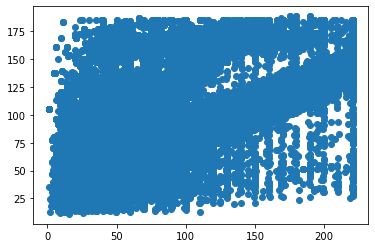

In [190]:
plt.scatter(y_train, y_pred_train)
plt.show()

In [191]:
#### Prediction on Test data
y_pred_test = lm1.predict(data_test)

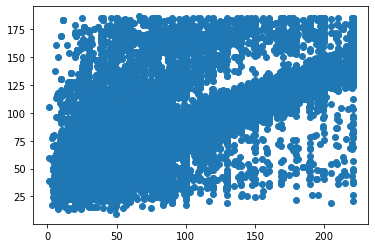

In [192]:
plt.scatter(y_test, y_pred_test)
plt.show()

In [193]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-1.38) * Intercept + (1.23) * freight_value + (3.67) * payment_type + (1.22) * payment_installments + (0.46) * payment_value + 

#### Interpretation = when freight_value increase by 1 unit, price increases by 1.23 unit. When payment_value increases by 1 unit ,price increases by 0.46 unit. No negative coefficients observed.

#### Variation inflation factor

In [194]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [195]:
#### payment_sequential was having VIF of 18
i=0
for column in X.columns:
        print (column ,"--->",  vif[i])
        i=i+1
      

freight_value ---> 7.153408215393271
payment_type ---> 3.905125389983694
payment_installments ---> 3.0339031691119738
payment_value ---> 3.836422029652995


#### Except Freight_value all other variables has VIF less than 5, which says only freight_value has multicollinearity.

## Iteration 2 

#### To improve model accuracy, we are scaling independent attributes

In [147]:
df_new.head()

,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,1,58.90,13.29,1,1,2,72.19
1,1,239.90,19.93,1,1,3,259.83
2,1,199.00,17.87,1,1,5,216.87
3,1,12.99,12.79,1,1,2,25.78
4,1,199.90,18.14,1,1,3,218.04


In [148]:
df_new= df_new.drop(['order_item_id','payment_sequential'], axis=1)
df_new.head()

,price,freight_value,payment_type,payment_installments,payment_value
0,58.90,13.29,1,2,72.19
1,239.90,19.93,1,3,259.83
2,199.00,17.87,1,5,216.87
3,12.99,12.79,1,2,25.78
4,199.90,18.14,1,3,218.04


In [149]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [150]:
lr,ur=remove_outlier(df_new['freight_value'])
df_new['freight_value']=np.where(df_new['freight_value']>ur,ur,df_new['freight_value'])
df_new['freight_value']=np.where(df_new['freight_value']<lr,lr,df_new['freight_value'])
        

In [151]:
lr,ur=remove_outlier(df_new['payment_value'])
df_new['payment_value']=np.where(df_new['payment_value']>ur,ur,df_new['payment_value'])
df_new['payment_value']=np.where(df_new['payment_value']<lr,lr,df_new['payment_value'])

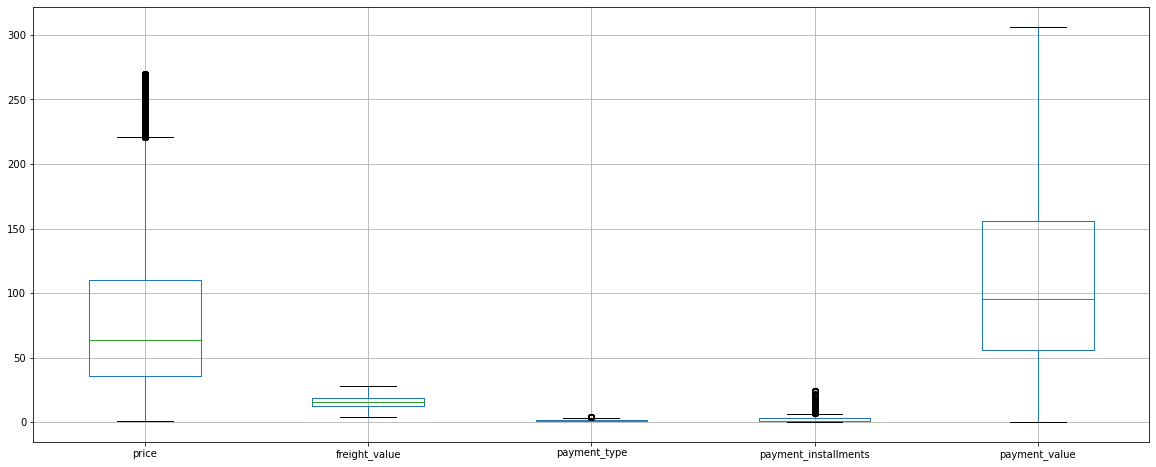

In [152]:
df_new.boxplot(figsize=(20,8));

In [141]:
###df_new['price']= np.log(df_new['price'])
###sns.distplot(df_new['price'])
###fig = plt.figure()

In [153]:
df_new.head()

,price,freight_value,payment_type,payment_installments,payment_value
0,58.90,13.29,1,2,72.19
1,239.90,19.93,1,3,259.83
2,199.00,17.87,1,5,216.87
3,12.99,12.79,1,2,25.78
4,199.90,18.14,1,3,218.04


In [154]:
X=df_new.drop('price',axis=1)
y=df_new[['price']]

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [157]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [158]:
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [159]:
for idx, col_name in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for freight_value is 0.12018563799590445
The coefficient for payment_type is 0.03392569536387613
The coefficient for payment_installments is 0.026572100305749413
The coefficient for payment_value is 0.6552821859274393


In [160]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -9.200622451614512e-17


In [198]:
regression_model.score(X_train_scaled, y_train_scaled) ## R^2 on train data

-14.366700169934422

In [199]:
regression_model.score(X_test_scaled, y_test_scaled) ## R^2 on test data

-14.410308854174271

In [200]:
from sklearn import metrics
predicted_train=regression_model.fit(X_train_scaled, y_train_scaled).predict(X_train_scaled) ## RMSE on train data
np.sqrt(metrics.mean_squared_error(y_train_scaled,predicted_train))

0.7111883152025217

In [202]:
predicted_test=regression_model.fit(X_train_scaled, y_train_scaled).predict(X_test_scaled) ## RMSE on test data
np.sqrt(metrics.mean_squared_error(y_test_scaled,predicted_test))

0.7030416852386814

#### WE don't observe any improvement after scaling the variables

### Iteration 3

In [220]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=100, random_state=1)
RF.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [221]:
### train accuracy, RF
y_predict_train_RF = RF.predict(X_train)
R_sq_RF = metrics.r2_score(y_train, y_predict_train_RF)
R_sq_RF

0.9679551346660759

In [222]:
### test accuaracy, RF
y_predict_RF = RF.predict(X_test)
from sklearn import metrics
R_sq = metrics.r2_score(y_test, y_predict_RF)
R_sq

0.8385437752235748

In [223]:
### R-Square error on train data, Random Forest 
predicted_train=RF.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

9.731808329617678

In [224]:
### R-Square error on test data, Random Forest 
predicted_train=RF.fit(X_test, y_test).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_train))

11.059979697506648

#### RF regression has increased the accuracy, and also reduced R square value